<img src="escuela_economia_una_logo.png" width="260" height="60">
<center>
    <b>Econometría</b><br>
    <b>Profesor:  Alexander Amoretti</b><br>
    <b>Desarrollo:  Diego Armando Barquero Sánchez, Estudiante de Tercer Ciclo</b>
<br><br>   
<div style="font-size:200%;color:white; background-color: #630b57;">Regresión Lineal Múltiple</div>
<div style="font-size:100%;color:white; background-color: #630b57;">Empleando el PIB(Ingreso) y la Inversión(FBKF) para explicar las Importaciones</div>

<i>Creado:     2023-oct-10 
    <br>
    Actualizado: 2023-oct-16</i>

## *Librerías*

In [44]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import kurtosis
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.stats.diagnostic import acorr_breusch_godfrey
from statsmodels.tsa.ar_model import AutoReg

## *Cargamos los datos*

In [45]:
datos = pd.read_excel("datos.xlsx")

### *Visualizamos las dimensiones del DataFrame*

In [46]:
datos.shape

(130, 4)

### *Llamamos a las primeras y últimas 5 filas del DataFrame*

In [47]:
datos.head()

Trimestre            PIB            IMP           INV
0    1991Q1  211970.455971   71181.100182  34479.314728
1    1991Q2  208473.758009   79216.569368  35237.071601
2    1991Q3  217245.621496   86079.216215  36861.776360
3    1991Q4  243350.246525   98614.104142  43243.551795
4    1992Q1  272319.119390  105938.372689  49689.555732

In [48]:
datos.tail()

Trimestre           PIB           IMP           INV
125    2022Q2  1.051583e+07  4.208157e+06  1.950689e+06
126    2022Q3  1.101235e+07  4.454582e+06  1.851293e+06
127    2022Q4  1.186846e+07  4.281150e+06  2.126651e+06
128    2023Q1  1.171014e+07  3.934331e+06  1.994061e+06
129    2023Q2  1.110575e+07  3.638870e+06  2.019315e+06

# Datos:
### - PIB : Producto Interno Bruto 
### - IMP : Importaciones 
### - INV : Formación Bruta de Capital Fijo

### *Cambiamos el índice del DataFrame con el periodo de la recolección de datos*
Primer trimestre de 1991 hasta el segundo trimestre del 2023

In [49]:
index = pd.Index(sm.tsa.datetools.dates_from_range("1991Q1", "2023Q2"))
datos.set_index(index, inplace=True)

Vemos los resultados de cambiar el índice llamando otra vez a las primeras filas

In [50]:
datos.head()

Trimestre            PIB            IMP           INV
1991-03-31    1991Q1  211970.455971   71181.100182  34479.314728
1991-06-30    1991Q2  208473.758009   79216.569368  35237.071601
1991-09-30    1991Q3  217245.621496   86079.216215  36861.776360
1991-12-31    1991Q4  243350.246525   98614.104142  43243.551795
1992-03-31    1992Q1  272319.119390  105938.372689  49689.555732

## Análisis Descriptivo

In [52]:
# Lo que estamos haciendo es elegir las columnas del dataframe, solo las numericas 
columnas = datos.select_dtypes(include=np.number).columns.tolist()
columnas

['PIB', 'IMP', 'INV']

𝑐𝑜𝑣 𝑢𝑖, 𝑢𝑗 = 0

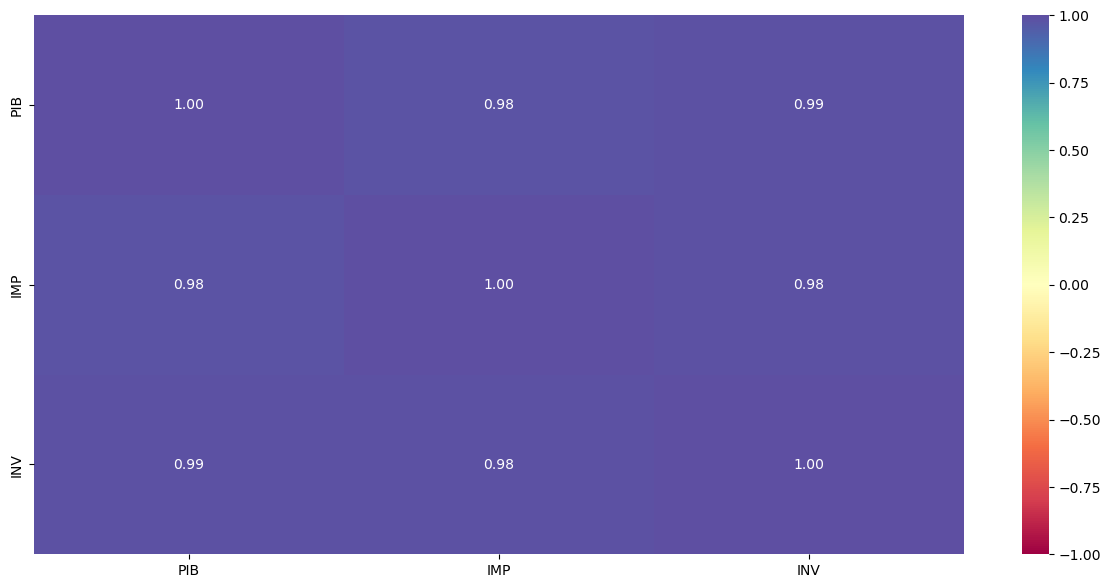

In [54]:
# Empleamos el siguiente código 
plt.figure(figsize=(15, 7))
sns.heatmap(
    datos[columnas].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

### - Como podemos observar todas las variables poseen una gran correlación positiva entre sí

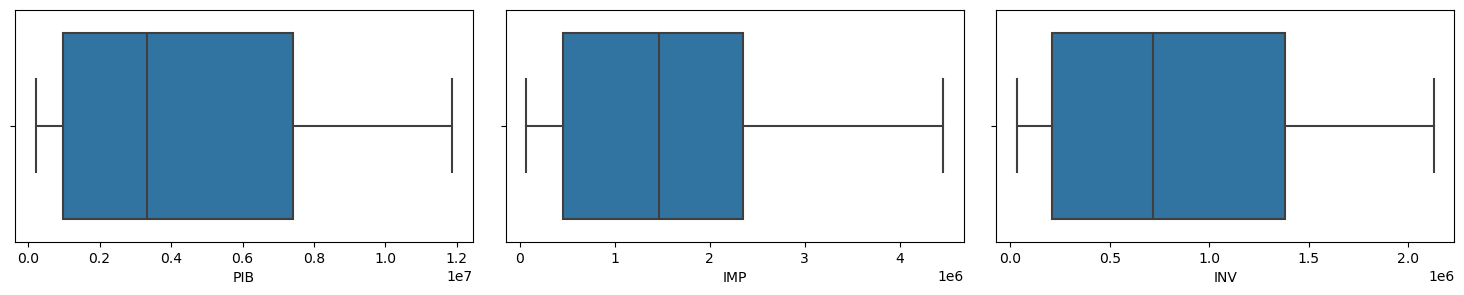

In [55]:
# Con este código podemos observar un gráfico con boxplots para observar la distribución en cuantiles
plt.figure(figsize=(15, 15))

for i, variable in enumerate(columnas):
    plt.subplot(5, 3, i + 1)
    sns.boxplot(data=datos, x=variable)
    plt.tight_layout(pad=2)

plt.show()

###  - Como podemos observar ningunas de las variables poseen valores átipicos

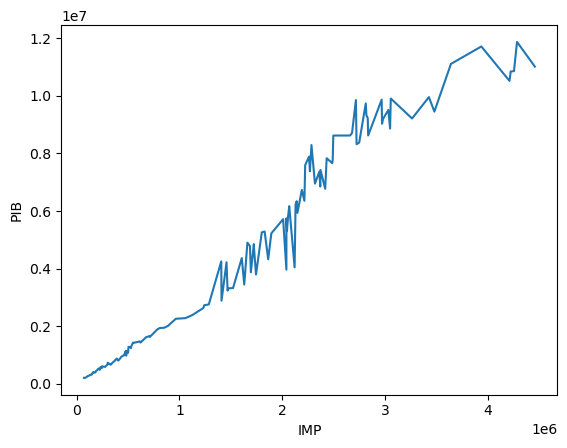

In [56]:
sns.lineplot(data = datos, x = "IMP", y = "PIB")
plt.show()

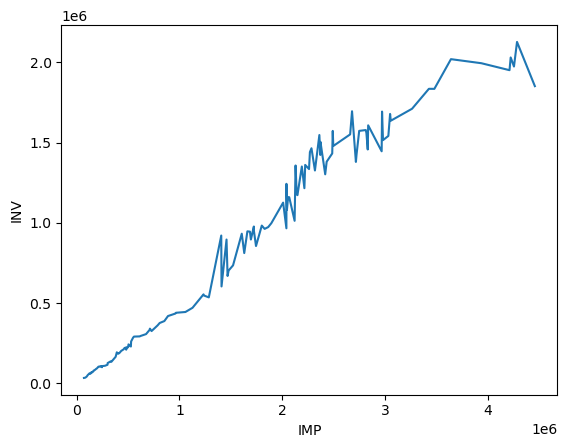

In [58]:
sns.lineplot(data = datos, x = "IMP", y = "INV")
plt.show()

# Regresión Lineal empleando MCO

# $y_t= 𝛽_1 + 𝛽_2𝑥_2𝑡 + 𝛽_3𝑥_3𝑡 +\epsilon_𝑡$

In [60]:
# Define la variable dependiente en este caso las Importaciones
y = datos['IMP']

# Define la variable explicativa en este caso el ingreso o el PIB además de la inversión 
x = datos[['PIB',"INV"]]

# Se agrega la variable constante
x = sm.add_constant(x)

# Se realiza la regresion como tal 
model = sm.OLS(y, x).fit()

# Se imprime los resultados
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    IMP   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     2240.
Date:                Fri, 20 Oct 2023   Prob (F-statistic):          9.22e-100
Time:                        13:05:38   Log-Likelihood:                -1766.6
No. Observations:                 130   AIC:                             3539.
Df Residuals:                     127   BIC:                             3548.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        7.84e+04   2.84e+04      2.760      0.0

Como se observa en los resultados de la regresión, las variables explicativas (PIB y INV) son significativas en la columna P>t  a un nivel de significancia de 0.05.

## Pruebas 

In [61]:
# Creamos una base de datos a para realizar algunas pruebas y gráficos  
datos_f = pd.DataFrame()

datos_f["Reales"] = y  # yi
datos_f["Aprox"] = model.fittedvalues  # y^
datos_f["Residuos"] = model.resid  # ut

datos_f.head()

Reales          Aprox      Residuos
1991-03-31   71181.100182  143231.288412 -72050.188229
1991-06-30   79216.569368  143759.436225 -64542.866856
1991-09-30   86079.216215  146680.564744 -60601.348529
1991-12-31   98614.104142  157236.490995 -58622.386853
1992-03-31  105938.372689  168184.683229 -62246.310540

## -Normalidad-

Realizamos un histograma para visualizar la distribución de los residuos

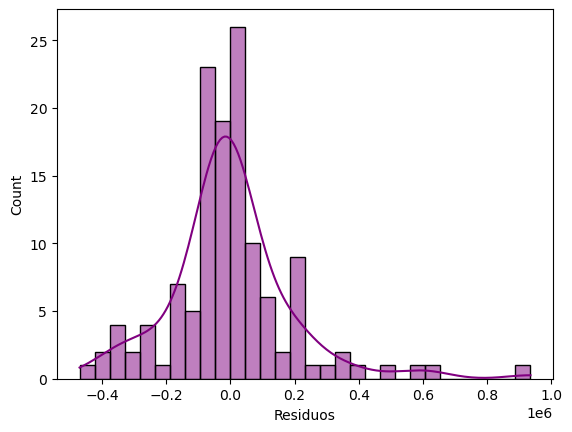

In [62]:
sns.histplot(data = datos_f, x = "Residuos", kde = True , color = "purple");

Empleamos tanto el Jarque Bera como el Shapiro para poder determinar si los residuos se comportan de forma normal 

In [64]:
JB_pv = sm.stats.stattools.jarque_bera(model.resid, axis=0)[1]
print("El p-value de prueba JB es ", JB_pv)

El p-value de prueba JB es  1.2057640574225042e-33


In [66]:
stats.shapiro(model.resid)

ShapiroResult(statistic=0.8973555564880371, pvalue=5.6137789528065696e-08)

Como podemos observar tanto el test de Jarque Bera como el Shapiro nos indican la no existencia de un comportamiento normal en la distribución de los residuos

### Normalidad  ✗ 

## -Heterocedasticidad-

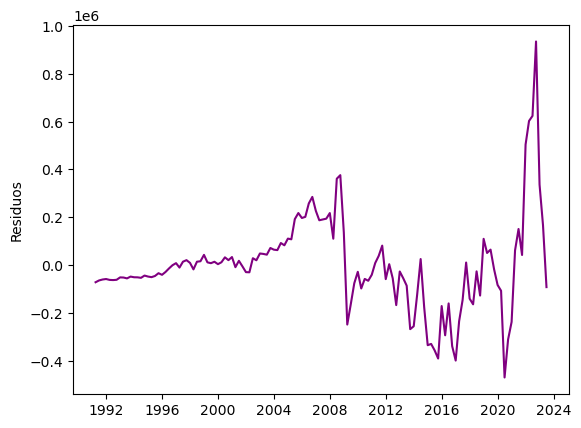

In [67]:
sns.lineplot(data = datos_f, x = datos_f.index, y = "Residuos", color = "purple");

A simple vista podemos observar como los residuos aparentan no ser homocedasticos. No obstante emplearemos el Breaush Pagan así como el Goldfeldquandt

In [71]:
Nombres = ['Lagrange multiplier statistic', 'p-value',
         'f-value', 'f p-value']
BP_results = sms.het_breuschpagan(model.resid, model.model.exog)
 
lzip(Nombres, BP_results)

[('Lagrange multiplier statistic', 24.029492891265463),
 ('p-value', 6.054271841188648e-06),
 ('f-value', 14.399032714165322),
 ('f p-value', 2.3112420418825816e-06)]

In [73]:
nombres = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(model.resid, x)
lzip(nombres, test)

[('F statistic', 67.420850086686), ('p-value', 1.9508734068321092e-40)]

Como ambos son sumamente significativos, descartamos la presencia de homocedasticidad en los residuos 

### Homocedasticidad  ✗

## -Autocorrelación-

Utilizaremos el método de Durbin Watson para descartar o aceptar la existencia de autocorrelación en los residuos 

In [74]:
sm.stats.stattools.durbin_watson(model.resid, axis=0)

0.3918017659875266

Dado los resultados podemos concluir que existe autocorrelación en los residuos

### No autocorrelación  ✗

## -Multicolinealidad-

Se emplea el Variance Inflation Factor para dictaminar la existencia o no de multicolinealidad 

In [75]:
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [77]:
checking_vif(x)

feature        VIF
0   const   2.752608
1     PIB  44.308104
2     INV  44.308104

Tanto PIB como INV poseen un factor inflacionario de varianza muy alto lo que indica multicolinealidad

### No Multicolinealidad  ✗

# ¿ Como Arreglar Modelos ? 

Primeramente hay que comprender que en economía no creamos modelos por crearlos, si no que intentamos solucionar un problema, en este caso al emplear una regresión lineal múltiple lo que intentamos es explicar adecuadamente el comportamiento de la variable dependiente frente a una perturbación en alguna de las predictoras(PIB, INV).

Por ello si bien no es correcto "forzar un modelo" se pueden emplear técnicas que nos permiten lograr cumplir los requisitos de muchos de los supuestos.

# Opciones: 

### - Cuestionar las relaciones:
Podría llegar a ser útil el cuestionar si las relaciones poseen un sentido económico más allá que uno estadístico, al final todo debe tener un sustento económico. En este caso particular podemos llegar a comprender y explicar la relación entre inversión y producción con las importaciones dado las siguientes caracteristicas
- Tanto la inversión como las importaciones forman parte de la ecuación para calcular el PIB 
- Visto desde una perspectiva de economía abierta, entre mayor sea el ingreso (PIB) los habitantes de esa economía podrán tener acceso a comprar más bienes extranjeros (importar) y a su vez tambíen podrán invertir más, lo anterior se puede demostrar empíricamente y numéricamente en la matriz de correlación

### - Emplear las formas funcionales de logaritmo natural o otros tipos de logaritmo
Esta opción es muy usual en economía y en general en los problemas de optimización dado que esta forma funcional visto desde una perspectiva estadística reduce drasticamente la varianza en el cálculo de los estimadores MELI lo cual puede ayudar a lograr los supuestos en la regresión lineal

# Forma Funcional Logaritmica

## $ In(Y_t) = \beta_0 + \beta_1In(X_t) + \epsilon_t$

Utilizamos la librería Numpy para encontrar las formas funcionales de logaritmo natural a las variables de estudios 

In [78]:
datos["LOGIMP"] = np.log(datos["IMP"])
datos["LOGPIB"] = np.log(datos["PIB"])
datos["LOGINV"] = np.log(datos["INV"])
datos.head()

Trimestre            PIB            IMP           INV     LOGIMP  \
1991-03-31    1991Q1  211970.455971   71181.100182  34479.314728  11.172983   
1991-06-30    1991Q2  208473.758009   79216.569368  35237.071601  11.279941   
1991-09-30    1991Q3  217245.621496   86079.216215  36861.776360  11.363023   
1991-12-31    1991Q4  243350.246525   98614.104142  43243.551795  11.498970   
1992-03-31    1992Q1  272319.119390  105938.372689  49689.555732  11.570613   

               LOGPIB     LOGINV  
1991-03-31  12.264202  10.448115  
1991-06-30  12.247568  10.469854  
1991-09-30  12.288784  10.514930  
1991-12-31  12.402257  10.674603  
1992-03-31  12.514730  10.813550

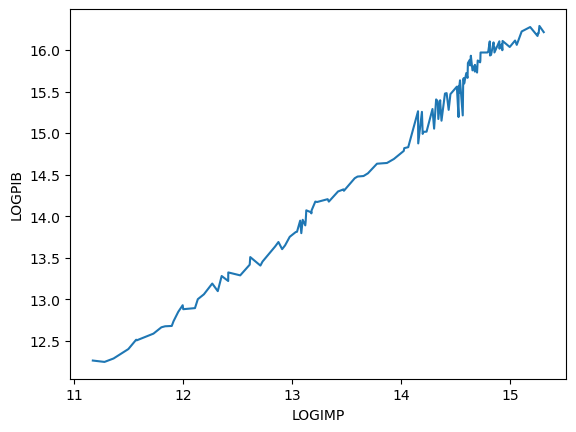

In [79]:
sns.lineplot(data = datos, x = "LOGIMP", y = "LOGPIB")
plt.show()

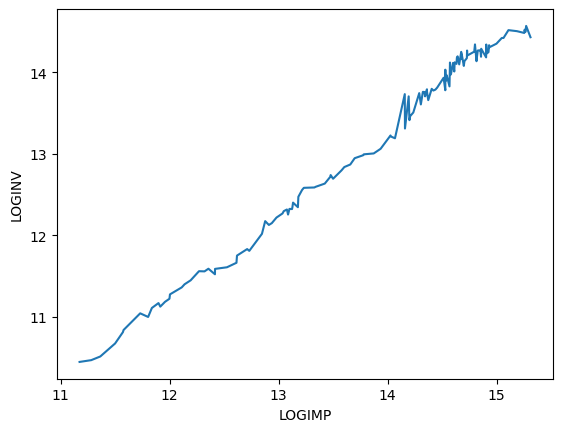

In [80]:
sns.lineplot(data = datos, x = "LOGIMP", y = "LOGINV")
plt.show()

Es muy importante que tenga sentido desde una perspectiva económica el hacer la forma funcional por ejemplo, en este caso la utilizare en las importaciones y en el PIB como logaritmos de tasas de cambio, no es lo mismo que una tasa de cambio normal, pero dejare a la inversión en su formato original para evitar que se repita la multicolinealidad

In [81]:
# Define la variable dependiente en este caso el LOGIMP
y = datos["LOGIMP"]

# Define la variable explicativa en este caso el logaritmo ingreso o el PIB y la inversión(Formación Bruta de Capital Fijo)
x = datos[["LOGPIB", "INV"]]

# Se agrega la variable constante
x = sm.add_constant(x)

# Se realiza la regresion como tal 
model = sm.OLS(y, x).fit()

# Se imprime los resultados
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 LOGIMP   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     6310.
Date:                Fri, 20 Oct 2023   Prob (F-statistic):          7.92e-128
Time:                        13:20:30   Log-Likelihood:                 102.55
No. Observations:                 130   AIC:                            -199.1
Df Residuals:                     127   BIC:                            -190.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2345      0.307     -4.024      0.0

In [82]:
# Creamos una base de datos a para realizar algunas pruebas y gráficos  
datos_f = pd.DataFrame()

datos_f["Reales"] = y  # yi
datos_f["Aprox"] = model.fittedvalues  # y^
datos_f["Residuos"] = model.resid  # ut

datos_f.head()

Reales      Aprox  Residuos
1991-03-31  11.172983  11.412172 -0.239190
1991-06-30  11.279941  11.394835 -0.114895
1991-09-30  11.363023  11.436990 -0.073967
1991-12-31  11.498970  11.552610 -0.053641
1992-03-31  11.570613  11.667184 -0.096571

## -Normalidad-

Volvemos a realizar un histograma pero ahora con la forma funcional para poder visualizar si la varianza disminuyo

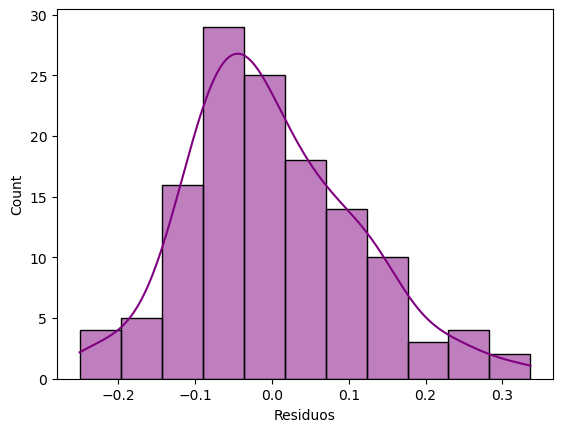

In [83]:
sns.histplot(data = datos_f, x = "Residuos", kde = True, color = "purple");

Volvemos a hacer el JB y Shapiro para confirmar la normalidad de los residuos 

In [84]:
JB_pv = sm.stats.stattools.jarque_bera(model.resid, axis=0)[1]
print("El p-value de prueba JB es ", JB_pv)

El p-value de prueba JB es  0.05758628207086525


In [85]:
stats.shapiro(model.resid)

ShapiroResult(statistic=0.9779832363128662, pvalue=0.03274992108345032)

Dado que solo el JB es  no significativo y este mide de forma global, podríamos decir que 

### Normalidad Solucionada ✔

## - Heterocedasticidad - 

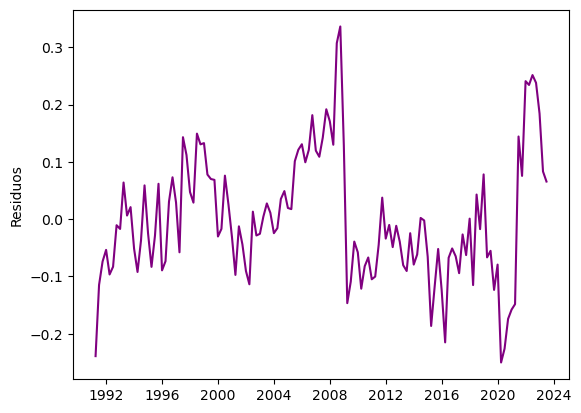

In [87]:
sns.lineplot(data = datos_f, x = datos_f.index, y = "Residuos", color = "purple");

Podemos observar como parece que se reduce la varianza y podría aparentar ser homocedástico sin embargo lo confirmarlemos con los test 

In [88]:
Nombres = ['Lagrange multiplier statistic', 'p-value',
         'f-value', 'f p-value']
BP_results = sms.het_breuschpagan(model.resid, x)
 
lzip(Nombres, BP_results)

[('Lagrange multiplier statistic', 11.486536007331622),
 ('p-value', 0.003204279548731716),
 ('f-value', 6.154533096009086),
 ('f p-value', 0.0028109012005751934)]

In [89]:
nombres = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(model.resid, x)
lzip(nombres, test)

[('F statistic', 1.3485016140930084), ('p-value', 0.1209521561514771)]

El BP es significativo lo cual nos indica heterocedasticidad, pero el GFQ nos indica homocedasticidad por lo cual en primera instancia

### Heterocedasticidad Solucionada ✗

## - Autocorrelación -

In [90]:
sm.stats.stattools.durbin_watson(model.resid, axis=0)

0.5008905544280514

En un mundo perfecto nos debería dar un estadístico cercano a 2, sin embargo no es el caso y no pudimos solucionar la autocorrelación


### Aucorrelación Solucionada  ✗

## - Multicolinealidad -

In [91]:
checking_vif(x)

feature         VIF
0   const  989.069365
1  LOGPIB    7.915388
2     INV    7.915388

Sin embargo, logramos solucionar la multicolinealidad dado que el VIF es alta en ambos casos lo cual nos permite decir que existe hay multicolinealidad


### Multicolinealidad Solucionada ✔

### - Como consecuencia de la existencia de residuos autocorrelacionados se puede realizar una corrección planteando los residuos como un modelo autorregresivo, esto se explica a continuación 

# Modelos Lineales con residuos auto regresivos

Partimos del modelo original 
## $ Y_t = \beta_0 + \beta_1X_t + \epsilon_t$
Podemos establecer que los residuos son forma de retardos temporales 
## $ \epsilon_t = \phi_1 \epsilon t-1 + \phi_2 \epsilon t-2 + ...$
Por consiguiente, un modelo AR podemos describirlo como
## $ \phi(B)\epsilon_t = w_t $ 
Recordando que w es ruido blanco. Si damos por hecho que existe la inversa obtenemos lo siguiente
## $ \epsilon_t = \phi^-1(B)w_t $
Dando así que un modelo lineal con residuos auto regresivos es 
## $ Y_t = \beta_0 + \beta_1X_t + \phi^-1(B)w_t$

## Tenemos que examinar los residuos como cualquier serie temporal 

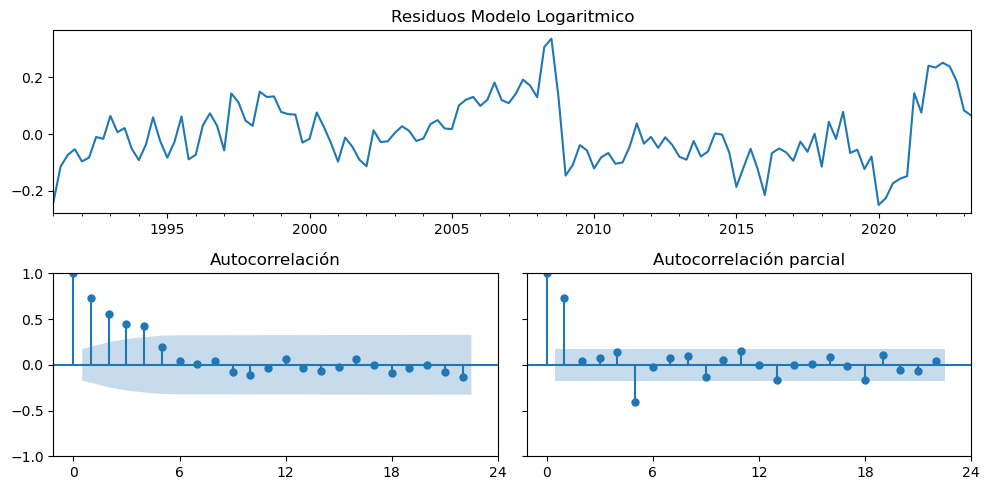

In [97]:
fig = plt.figure(figsize=[10,5], tight_layout=True)
gs = plt.GridSpec(2, 2)
ax = fig.add_subplot(gs[0, :])
axs0 = fig.add_subplot(gs[1,0])
axs1 = fig.add_subplot(gs[1,1], sharey=axs0)

model.resid.plot(ax=ax, title='Residuos Modelo Logaritmico', legend=None)
sm.graphics.tsa.plot_acf(model.resid, ax=axs0, title='Autocorrelación')
sm.graphics.tsa.plot_pacf(model.resid, ax=axs1, title='Autocorrelación parcial');
axs0.set_xticks(range(0,30,6))
axs1.set_xticks(range(0,30,6))
plt.show()

Revisamos que la serie sea estacionaria

In [99]:
resultado_adf = adfuller(model.resid)
if resultado_adf[1] <= 0.05:
    print("La serie de residuos es estacionaria.")
else:
    print("La serie de residuos no es estacionaria.")

La serie de residuos es estacionaria.


### Realizamos un modelo AR(1) utilizando los residuos como serie temporal

In [101]:
# Guardar los residuos del modelo de regresión lineal
residuos = model.resid

# Ajustar un modelo AR(1) a los residuos
modelo_ar = AutoReg(residuos, lags = 1, trend='t')
resultados_ar = modelo_ar.fit()

# Imprimir un resumen del modelo AR(1)
print(resultados_ar.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  130
Model:                     AutoReg(1)   Log Likelihood                 155.816
Method:               Conditional MLE   S.D. of innovations              0.072
Date:                Fri, 20 Oct 2023   AIC                           -305.632
Time:                        13:37:59   BIC                           -297.052
Sample:                    06-30-1991   HQIC                          -302.146
                         - 06-30-2023                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
trend       5.293e-06    8.4e-05      0.063      0.950      -0.000       0.000
y.L1           0.7320      0.058     12.671      0.000       0.619       0.845
                                    Roots           

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)


## Coefieciente asignado al primer rezago = 0.7320

## Ahora lo que debemos realizar es una restructuración de todas las variables empleando los resultados del AR(1)

Donde Y prima o ajustada es igual a la diferencia entre la Y original menos el coeficiente asignado al rezago 1 en el AR multiplicado por la Y con un rezago

## $ In(Y_t)´ = In(Y_t) - \beta_1var(1)In(Y_t-1)$

Entendiendo lo anterior, este procediemiento se repite para

- LOGPIB

In [102]:
datos["LOG_PIB_LAG"] = datos["LOGPIB"].shift(1)

In [103]:
datos["LOGPIB*"] = datos["LOGPIB"]- 0.7320*datos["LOG_PIB_LAG"]

- LOGIMP 

In [104]:
datos["LOG_IMP_LAG"] = datos["LOGIMP"].shift(1)

In [105]:
datos["LOGIMP*"] = datos["LOGIMP"] - 0.7320*datos["LOG_IMP_LAG"]

- INV

In [106]:
datos["INV_LAG"] = datos["INV"].shift(1)

In [107]:
datos["INV*"] = datos["INV"] - 0.7320*datos["INV_LAG"]

Visualizamos la base de datos para observar las variables ajustadas 

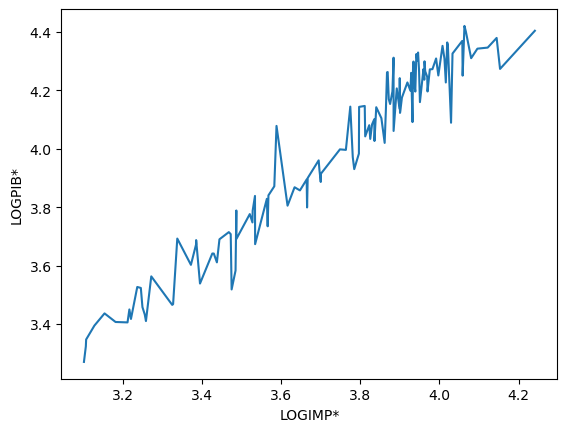

In [108]:
sns.lineplot(data = datos, x = "LOGIMP*", y = "LOGPIB*")
plt.show()

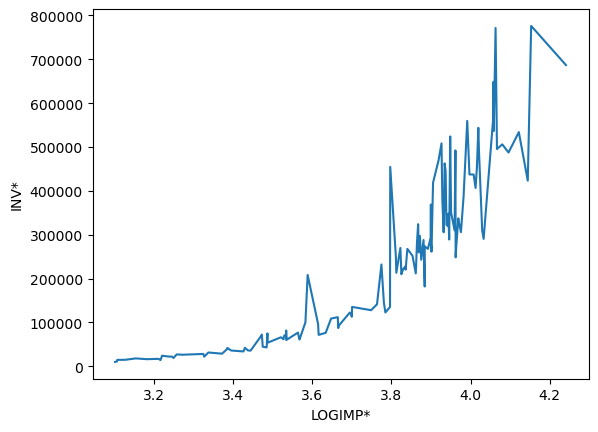

In [109]:
sns.lineplot(data = datos, x = "LOGIMP*", y = "INV*")
plt.show()

In [110]:
datos.head()

Trimestre            PIB            IMP           INV     LOGIMP  \
1991-03-31    1991Q1  211970.455971   71181.100182  34479.314728  11.172983   
1991-06-30    1991Q2  208473.758009   79216.569368  35237.071601  11.279941   
1991-09-30    1991Q3  217245.621496   86079.216215  36861.776360  11.363023   
1991-12-31    1991Q4  243350.246525   98614.104142  43243.551795  11.498970   
1992-03-31    1992Q1  272319.119390  105938.372689  49689.555732  11.570613   

               LOGPIB     LOGINV  LOG_PIB_LAG   LOGPIB*  LOG_IMP_LAG  \
1991-03-31  12.264202  10.448115          NaN       NaN          NaN   
1991-06-30  12.247568  10.469854    12.264202  3.270172    11.172983   
1991-09-30  12.288784  10.514930    12.247568  3.323564    11.279941   
1991-12-31  12.402257  10.674603    12.288784  3.406867    11.363023   
1992-03-31  12.514730  10.813550    12.402257  3.436278    11.498970   

             LOGIMP*       INV_LAG          INV*  
1991-03-31       NaN           NaN           NaN  
1991-06-30  3.101317  34479.314728   9998.213220  
1991-09-30  3.106107  35237.071601  11068.239948  
1991-12-31  3.181237  36861.776360  16260.731499  
1992-03-31  3.153367  43243.551795  18035.275818

In [111]:
datos.tail()

Trimestre           PIB           IMP           INV     LOGIMP  \
2022-06-30    2022Q2  1.051583e+07  4.208157e+06  1.950689e+06  15.252535   
2022-09-30    2022Q3  1.101235e+07  4.454582e+06  1.851293e+06  15.309444   
2022-12-31    2022Q4  1.186846e+07  4.281150e+06  2.126651e+06  15.269732   
2023-03-31    2023Q1  1.171014e+07  3.934331e+06  1.994061e+06  15.185251   
2023-06-30    2023Q2  1.110575e+07  3.638870e+06  2.019315e+06  15.107184   

               LOGPIB     LOGINV  LOG_PIB_LAG   LOGPIB*  LOG_IMP_LAG  \
2022-06-30  16.168393  14.483693    16.200141  4.309890    15.262811   
2022-09-30  16.214528  14.431395    16.168393  4.379264    15.252535   
2022-12-31  16.289395  14.570059    16.214528  4.420361    15.309444   
2023-03-31  16.275966  14.505684    16.289395  4.352129    15.269732   
2023-06-30  16.222974  14.518269    16.275966  4.308967    15.185251   

             LOGIMP*       INV_LAG           INV*  
2022-06-30  4.080157  1.973431e+06  506137.124935  
2022-09-30  4.144588  1.950689e+06  423388.367643  
2022-12-31  4.063219  1.851293e+06  771505.088434  
2023-03-31  4.007807  2.126651e+06  437352.734249  
2023-06-30  3.991580  1.994061e+06  559661.826083

In [115]:
# asignamos las predeterminadas y explicadas
newx = datos[["LOGPIB*", "INV*"]].dropna()
newy = datos["LOGIMP*"].loc["1991-06-30":"2023-06-30"]
# Se agrega la variable constante
newx = sm.add_constant(newx)

# Se realiza la regresion como tal 
model = sm.OLS(newy, newx).fit()

# Se imprime los resultados
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                LOGIMP*   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     1244.
Date:                Fri, 20 Oct 2023   Prob (F-statistic):           1.10e-83
Time:                        13:46:08   Log-Likelihood:                 175.48
No. Observations:                 129   AIC:                            -345.0
Df Residuals:                     126   BIC:                            -336.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4880      0.131      3.735      0.0

In [116]:
# Creamos una base de datos a para realizar algunas pruebas y gráficos  
datos_f = pd.DataFrame()

datos_f["Reales"] = y  # yi
datos_f["Aprox"] = model.fittedvalues  # y^
datos_f["Residuos"] = model.resid  # ut

datos_f.head()

Reales     Aprox  Residuos
1991-03-31  11.172983       NaN       NaN
1991-06-30  11.279941  3.118708 -0.017391
1991-09-30  11.363023  3.161804 -0.055698
1991-12-31  11.498970  3.229610 -0.048374
1992-03-31  11.570613  3.253540 -0.100173

## -Normalidad-

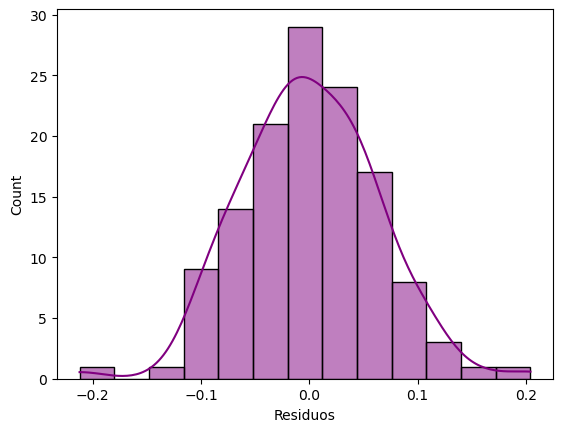

In [117]:
sns.histplot(data = datos_f, x = "Residuos", kde = True, color = "purple");

In [118]:
JB_pv = sm.stats.stattools.jarque_bera(model.resid, axis=0)[1]
print("El p-value de prueba JB es ", JB_pv)

El p-value de prueba JB es  0.2764411940399963


In [119]:
stats.shapiro(model.resid)

ShapiroResult(statistic=0.9895267486572266, pvalue=0.4382932484149933)

Tanto el Shapiro como el JB nos indican normalidad en los residuos 

### Normalidad Solucionada ✔

## - Heterocedasticidad - 

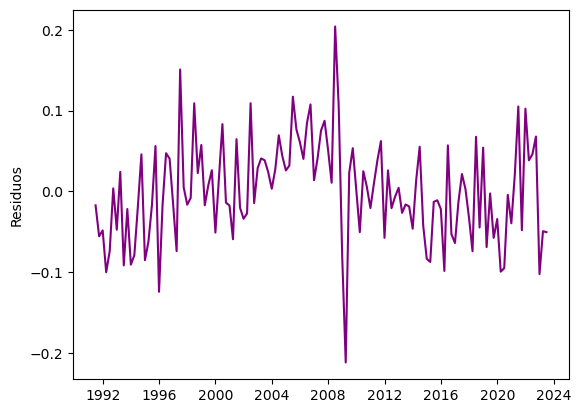

In [120]:
sns.lineplot(data = datos_f, x = datos_f.index, y = "Residuos", color = "purple");

In [121]:
Nombres = ['Lagrange multiplier statistic', 'p-value',
         'f-value', 'f p-value']
BP_results = sms.het_breuschpagan(model.resid, newx)
 
lzip(Nombres, BP_results)

[('Lagrange multiplier statistic', 0.6522664753664142),
 ('p-value', 0.721709022187375),
 ('f-value', 0.32016761667394106),
 ('f p-value', 0.7266162372826716)]

In [122]:
nombres = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(model.resid, newx)
lzip(nombres, test)

[('F statistic', 1.4057656251388453), ('p-value', 0.0920702072932702)]

Se logra que tanto el BP como el GFQ nos indiquen homocedasticidad

### Heterocedasticidad Solucionada ✔

## - Autocorrelación -

In [123]:
sm.stats.stattools.durbin_watson(model.resid, axis=0)

1.5808830026952676

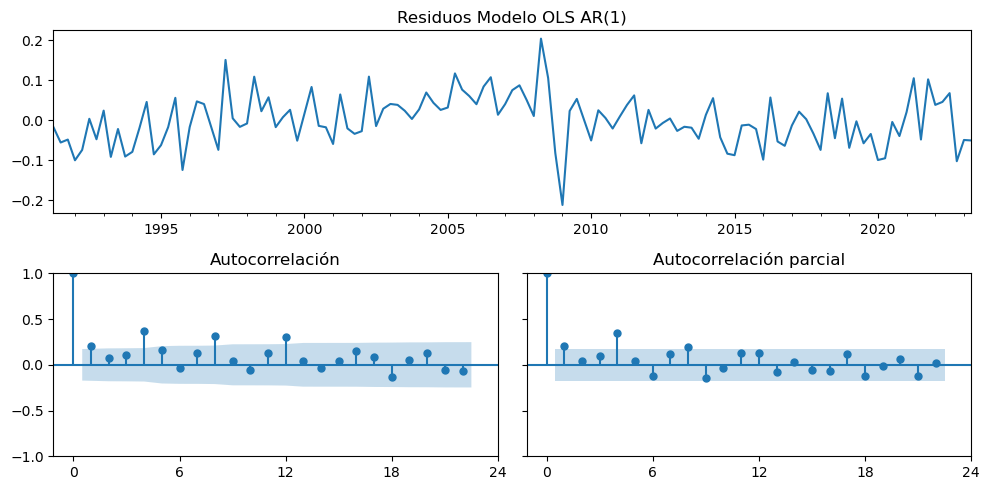

In [125]:
fig = plt.figure(figsize=[10,5], tight_layout=True)
gs = plt.GridSpec(2, 2)
ax = fig.add_subplot(gs[0, :])
axs0 = fig.add_subplot(gs[1,0])
axs1 = fig.add_subplot(gs[1,1], sharey=axs0)

model.resid.plot(ax=ax, title='Residuos Modelo OLS AR(1)', legend=None)
sm.graphics.tsa.plot_acf(model.resid, ax=axs0, title='Autocorrelación')
sm.graphics.tsa.plot_pacf(model.resid, ax=axs1, title='Autocorrelación parcial');
axs0.set_xticks(range(0,30,6))
axs1.set_xticks(range(0,30,6))
plt.show()

Si bien el Durbin Watson nos da un valor de aproximadamente 1.6 , este es lo suficientemente cercano a 2 como para convivir con ese 0.419 de autocorrelación pero aún pueden indicar cierto grado de autocorrelación que debe ser evaluado en el contexto del análisis

### Aucorrelación Solucionada  ✔

## - Multicolinealidad -


In [126]:
checking_vif(newx)

feature         VIF
0    const  558.208192
1  LOGPIB*    4.029824
2     INV*    4.029824

Muy bajo para ambas variables predeterminadas por lo que no hay multicolinealidad 

### Multicolinealidad Solucionada  ✔

De esta forma se logra cumplir con todos los supuestos sobre los residuos del modelo de regresión lineal múltiple